In [4]:
from google.colab import files
uploaded = files.upload()

Saving ifood_df.csv to ifood_df (1).csv


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('ifood_df.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [6]:
df.shape

(2205, 39)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [8]:
df.describe(include='all')

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [9]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [10]:
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [11]:
df.isna().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [12]:
df.duplicated().sum()

np.int64(184)

In [13]:
df[df.duplicated()]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
77,38620.0,0,0,56,112,17,44,34,22,89,...,1,0,0,0,0,1,0,229,140,0
167,78497.0,0,0,44,207,26,447,75,0,223,...,0,0,1,0,0,0,0,755,532,1
267,51369.0,0,1,84,297,7,79,0,11,182,...,1,0,0,0,1,0,0,394,212,0
268,37760.0,0,0,20,84,5,38,150,12,28,...,1,0,0,0,1,0,0,289,261,0
346,37717.0,1,0,31,9,0,6,4,1,5,...,0,0,0,0,0,0,1,20,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,22775.0,1,0,40,5,1,8,0,0,1,...,1,0,0,0,1,0,0,14,13,0
2188,75777.0,0,0,12,712,26,538,69,13,80,...,0,0,0,0,0,1,0,1358,1278,2
2192,58554.0,1,1,55,368,24,68,38,0,88,...,1,0,0,0,1,0,0,498,410,0
2199,34421.0,1,0,81,3,3,7,6,2,9,...,0,0,0,0,1,0,0,21,12,0


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(2021, 39)

In [16]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [17]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,0,0,1,0,0,19,16,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


In [18]:
#Checking for unique values to evaluate which columns to drop
df.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


In [19]:
#Dropping the Z_Revenue and Z_costcontact columns

df.drop(['Z_Revenue', 'Z_CostContact'], axis=1, inplace=True)

In [20]:
df.shape

(2021, 37)

In [21]:
df.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


# Data Exploration


In [22]:
#Checking for the sum of grand total amount and displaying on box plot

df['MntTotal'].sum()

np.int64(1139418)

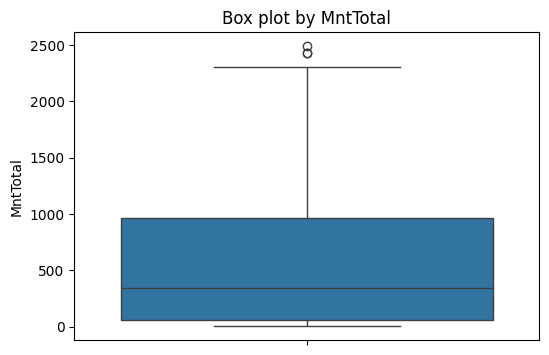

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='MntTotal')
plt.title('Box plot by MntTotal')
plt.ylabel('MntTotal')
plt.show()

#To plot MntTotal against Income

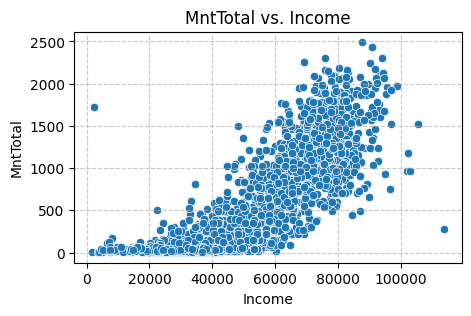

In [37]:
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='Income', y='MntTotal')
plt.title('MntTotal vs. Income')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

####From the scatter plot of 'MntTotal' against 'Income', we can observe a general positive correlation. This means that as a customer's Income increases, their MntTotal (total amount spent) tends to also increase. The points on the plot generally trend upwards and to the right, indicating that higher earners are more likely to spend more on products. However, there might be some outliers or variations, suggesting that income isn't the only factor influencing spending

In [25]:
df['NumKids'] = df['Kidhome'] + df['Teenhome']
display(df.head())

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,NumKids
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,2
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,1


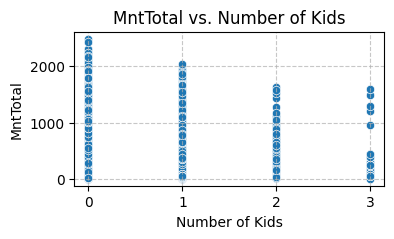

In [38]:
plt.figure(figsize=(4, 2))
sns.scatterplot(data=df, x='NumKids', y='MntTotal')
plt.title('MntTotal vs. Number of Kids')
plt.xlabel('Number of Kids')
plt.ylabel('MntTotal')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(sorted(df['NumKids'].unique())) # Ensure all kid numbers are shown
plt.show()

####From the scatter plot of 'MntTotal' against 'NumKids', it appears there might be an inverse relationship. Customers with fewer children (0 or 1) tend to have a wider range of MntTotal values, including some of the highest spending. As the number of children increases (2 or 3), the maximum MntTotal tends to decrease, and the overall spread of spending also seems to narrow, suggesting that households with more children might spend less on the types of products measured by MntTotal.

In [27]:
avg_mnttotal_per_numkids = df.groupby('NumKids')['MntTotal'].mean().reset_index()
display(avg_mnttotal_per_numkids)

,NumKids,MntTotal
0,0,1056.282187
1,1,432.732230
2,2,223.267016
3,3,240.044444


/tmp/ipython-input-45407962.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NumKids', y='MntTotal', data=avg_mnttotal_per_numkids, palette='viridis')


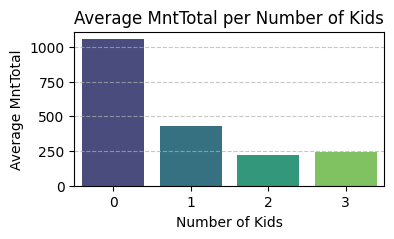

In [39]:
plt.figure(figsize=(4, 2))
sns.barplot(x='NumKids', y='MntTotal', data=avg_mnttotal_per_numkids, palette='viridis')
plt.title('Average MntTotal per Number of Kids')
plt.xlabel('Number of Kids')
plt.ylabel('Average MntTotal')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
# List of education columns
education_cols = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

# Function to determine education level
def get_education_level(row):
    for col in education_cols:
        if row[col] == 1:
            return col.replace('education_', '')
    return 'Unknown' # In case none are 1

# Apply the function to create the new column
df['Education_Level'] = df.apply(get_education_level, axis=1)

display(df[['Education_Level', 'MntTotal']].head())

,Education_Level,MntTotal
0,Graduation,1529
1,Graduation,21
2,Graduation,734
3,Graduation,48
4,PhD,407


In [30]:
# Calculate the average MntTotal per Education_Level
avg_mnttotal_per_education = df.groupby('Education_Level')['MntTotal'].mean().reset_index()
display(avg_mnttotal_per_education)

,Education_Level,MntTotal
0,2n Cycle,453.573770
1,Basic,61.163265
2,Graduation,573.530049
3,Master,579.229851
4,PhD,631.530752


/tmp/ipython-input-696862436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education_Level', y='MntTotal', data=avg_mnttotal_per_education, palette='crest')


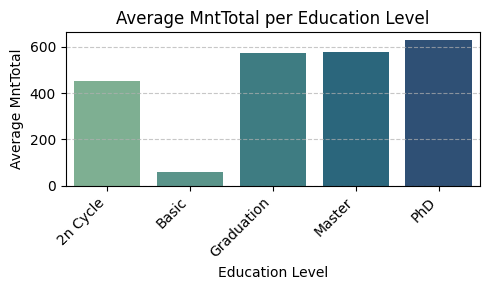

In [40]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Education_Level', y='MntTotal', data=avg_mnttotal_per_education, palette='crest')
plt.title('Average MntTotal per Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average MntTotal')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In this dataset, the education level was originally represented by several one-hot encoded columns: education_2n Cycle, education_Basic, education_Graduation, education_Master, and education_PhD. To simplify analysis, I created a new column called Education_Level that consolidates these into a single category for each customer.

Here's what each level generally signifies:

2n Cycle: Typically refers to a secondary education level, often equivalent to a high school diploma or vocational training.

Basic: Represents primary education.

Graduation: Implies a bachelor's degree or equivalent.

Master: Refers to a master's degree.

PhD: Indicates a doctorate degree.

This Education_Level column allowed us to analyze how total spending (MntTotal) varies across different educational backgrounds of the customers.



##Displaying Some Histogram for Visualization

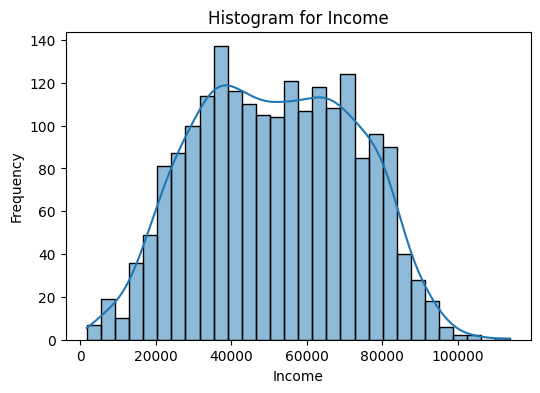

In [32]:
#Histogram for Income

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

the histogram suggests that while there's a broad range of incomes, a larger proportion of the customer base earns less, with a smaller number of customers earning substantially more.

In essence, it tells us that while there are some high-earning customers, the majority of the customer base falls into the lower and middle-income categories.


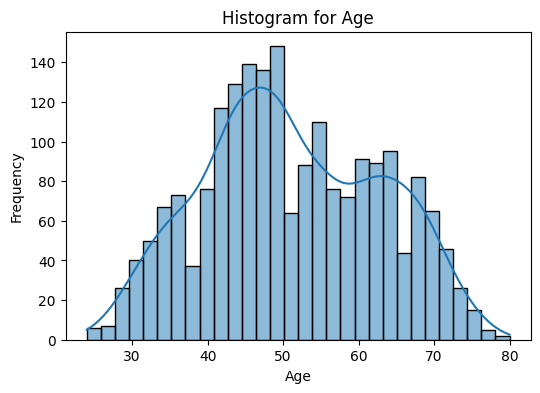

In [33]:
#Histogram for age
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Based on the histogram for customer ages, the distribution appears to be approximately normal or slightly left-skewed (negatively skewed). This means:

Most customers are concentrated around a central age group, likely in their 40s or 50s, as indicated by the highest bars in the middle of the distribution.
There's a gradual decrease in frequency towards both younger and older ages, but potentially a slightly longer tail towards the younger side or a sharper drop on the older side (depending on the exact skew).
In general, the customer base seems to be mature, with the majority falling into middle-aged categories, and fewer very young or very old customers.

#determination of marital status

In [34]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
df['Marital'] = df.apply(get_marital_status, axis=1)

/tmp/ipython-input-3652930935.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital', y='MntTotal', data=df, palette='viridis')


Text(0, 0.5, 'MntTotal')

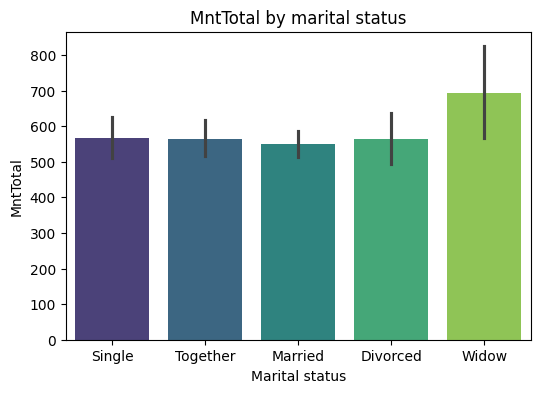

In [35]:
#Barplot for visualization and Comparison

plt.figure(figsize=(6, 4))
sns.barplot(x='Marital', y='MntTotal', data=df, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

#K-Means Clustering

In [49]:
display(cluster_characteristics)

,Income,Recency,NumKids,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,,,,,,,,,,
0,34404.042999,48.869901,1.224917,40.524807,4.783903,21.889746,6.721058,4.963616,15.135612,48.374862,1.897464,2.080485,0.536935,3.198456,6.404631
1,62762.798658,48.527964,0.852349,536.957494,29.268456,170.360179,37.984340,28.959732,61.709172,55.834452,2.389262,6.266219,3.664430,8.382550,4.814318
2,49556.095023,48.633484,1.583710,330.746606,12.104072,105.769231,18.823529,13.619910,54.696833,52.733032,6.194570,6.018100,2.303167,6.009050,7.253394
3,76790.616592,49.378924,0.188341,604.372197,74.408072,484.813901,109.331839,77.697309,79.295964,51.165919,1.235426,5.154709,6.078475,8.432735,2.755605


In [50]:
cluster_characteristics = df.groupby('Cluster')[features_for_clustering].mean()
display(cluster_characteristics)

,Income,Recency,NumKids,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,,,,,,,,,,
0,34404.042999,48.869901,1.224917,40.524807,4.783903,21.889746,6.721058,4.963616,15.135612,48.374862,1.897464,2.080485,0.536935,3.198456,6.404631
1,62762.798658,48.527964,0.852349,536.957494,29.268456,170.360179,37.984340,28.959732,61.709172,55.834452,2.389262,6.266219,3.664430,8.382550,4.814318
2,49556.095023,48.633484,1.583710,330.746606,12.104072,105.769231,18.823529,13.619910,54.696833,52.733032,6.194570,6.018100,2.303167,6.009050,7.253394
3,76790.616592,49.378924,0.188341,604.372197,74.408072,484.813901,109.331839,77.697309,79.295964,51.165919,1.235426,5.154709,6.078475,8.432735,2.755605


Based on the characteristics displayed above, here are some proposed names for the clusters:

*   **Cluster 0: 'Budget-Conscious Families'** - Characterized by lower income, higher number of kids, and significantly lower spending across all product categories.
*   **Cluster 1: 'Mid-Income Balanced Spenders'** - Represents customers with moderate income, fewer kids, and balanced spending across various product categories.
*   **Cluster 2: 'Growing Families/Moderate Spenders'** - Similar to Cluster 1 in income but with a higher average number of kids and moderate spending.
*   **Cluster 3: 'Affluent Indulgers'** - Features the highest income, fewest kids, and highest spending, particularly on wines, meat, fruits, and gold products.

In [51]:
# Rename the clusters based on the identified characteristics
df['Cluster'] = df['Cluster'].map({
    0: 'Budget-Conscious Families',
    1: 'Mid-Income Balanced Spenders',
    2: 'Growing Families/Moderate Spenders',
    3: 'Affluent Indulgers'
})

# Display the updated DataFrame with named clusters
display(df[['Income', 'NumKids', 'MntTotal', 'Cluster']].head())

,Income,NumKids,MntTotal,Cluster
0,58138.0,0,1529,Affluent Indulgers
1,46344.0,2,21,Budget-Conscious Families
2,71613.0,0,734,Mid-Income Balanced Spenders
3,26646.0,1,48,Budget-Conscious Families
4,58293.0,1,407,Growing Families/Moderate Spenders


In [46]:
features_for_clustering = ['Income', 'Recency', 'NumKids', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Age', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
X = df[features_for_clustering]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering, index=df.index)
display(X_scaled_df.head())

print("From the elbow plot, the optimal number of clusters appears to be 4, as this is where the rate of decrease in WCSS significantly slows down.")

# Apply K-Means with the optimal number of clusters (e.g., 4)
k_optimal = 4 # Based on the elbow plot
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10) # n_init to suppress warning
df['Cluster'] = kmeans.fit_predict(X_scaled_df)

# Display the first few rows with the new cluster labels
display(df.head())

cluster_characteristics = df.groupby('Cluster')[features_for_clustering].mean()
display(cluster_characteristics)

,Income,Recency,NumKids,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0.311511,0.315068,-1.277576,0.973297,1.549924,1.728456,2.448975,1.461111,0.853147,1.018689,0.354046,1.411131,2.628352,-0.559667,0.684158
1,-0.258030,-0.375927,1.403609,-0.875480,-0.637837,-0.728158,-0.648771,-0.631988,-0.733988,1.275875,-0.174408,-1.131636,-0.587732,-1.178932,-0.140340
2,0.962228,-0.790525,-1.277576,0.354075,0.569203,-0.177695,1.337431,-0.150816,-0.037197,0.332861,-0.702863,1.411131,-0.230390,1.298128,-0.552589
3,-1.209260,-0.790525,0.063016,-0.875480,-0.562397,-0.664468,-0.502995,-0.583871,-0.753344,-1.295981,-0.174408,-0.768384,-0.945075,-0.559667,0.271909
4,0.318996,1.558860,0.063016,-0.395509,0.418323,-0.218638,0.152998,-0.006464,-0.559791,-1.038796,1.410956,0.321373,0.126953,0.059598,-0.140340


From the elbow plot, the optimal number of clusters appears to be 4, as this is where the rate of decrease in WCSS significantly slows down.


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,NumKids,Education_Level,Marital,Cluster
0,58138.0,0,0,58,635,88,546,172,88,88,...,1,0,0,1529,1441,0,0,Graduation,Single,3
1,46344.0,1,1,38,11,1,6,2,1,6,...,1,0,0,21,15,0,2,Graduation,Single,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,734,692,0,0,Graduation,Together,1
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,48,43,0,1,Graduation,Together,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,1,407,392,0,1,PhD,Married,2


,Income,Recency,NumKids,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,,,,,,,,,,
0,34404.042999,48.869901,1.224917,40.524807,4.783903,21.889746,6.721058,4.963616,15.135612,48.374862,1.897464,2.080485,0.536935,3.198456,6.404631
1,62762.798658,48.527964,0.852349,536.957494,29.268456,170.360179,37.984340,28.959732,61.709172,55.834452,2.389262,6.266219,3.664430,8.382550,4.814318
2,49556.095023,48.633484,1.583710,330.746606,12.104072,105.769231,18.823529,13.619910,54.696833,52.733032,6.194570,6.018100,2.303167,6.009050,7.253394
3,76790.616592,49.378924,0.188341,604.372197,74.408072,484.813901,109.331839,77.697309,79.295964,51.165919,1.235426,5.154709,6.078475,8.432735,2.755605


**Reasoning**:
Now that the data is scaled, I will calculate the Within-Cluster Sum of Squares (WCSS) for a range of k values (1 to 10) to determine the optimal number of clusters using the Elbow Method.



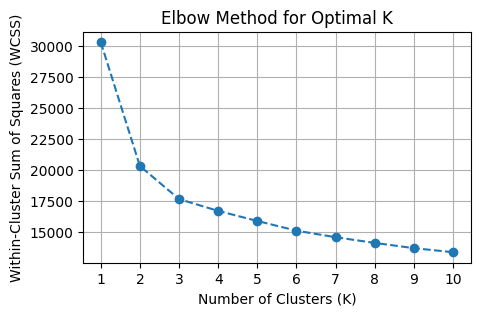

In [52]:
wcss = []
k_range = range(1, 11) # Test k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init to suppress warning
    kmeans.fit(X_scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(5, 3))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

**Reasoning**:
Based on the Elbow Method plot generated, I will identify the optimal number of clusters (k) and then apply the KMeans algorithm with this optimal k to cluster the scaled data. I will then add the resulting cluster labels to the original DataFrame for further analysis.



In [47]:
# This cell will be emptied as its content is moved to 3c7655f7 for sequential execution.

In [48]:
# This cell will be emptied as its content is moved to 3c7655f7 for sequential execution.

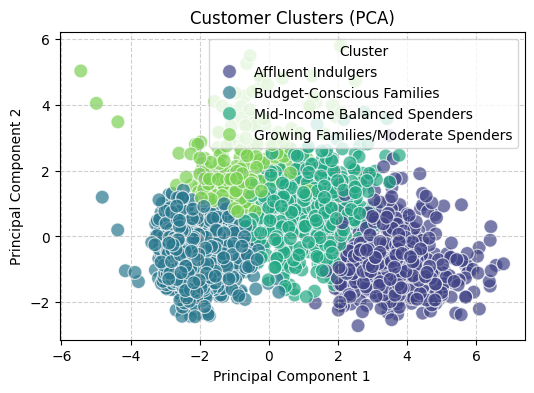

In [55]:
from sklearn.decomposition import PCA

# Initialize PCA to reduce to 2 principal components
pca = PCA(n_components=2, random_state=42)

# Fit PCA to the scaled data and transform it
X_pca = pca.fit_transform(X_scaled_df)

# Create a new DataFrame for the PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'], index=df.index)

# Add the 'Cluster' column from the original DataFrame to pca_df
pca_df['Cluster'] = df['Cluster']

# Create a scatter plot of the PCA components, colored by cluster
plt.figure(figsize=(6, 4))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Clusters (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster')
plt.show()


Based on our customer segmentation using K-Means clustering, here are the recommendations for each customer segment:

1. Budget-Conscious Families:

Characteristics: Lower income, higher number of kids, and significantly lower spending across all product categories.
Recommendation: Focus on value-for-money deals, family-sized product bundles, and essential items. Highlight cost savings and practical benefits. Consider loyalty programs that offer discounts on frequent purchases.

2. Mid-Income Balanced Spenders:

Characteristics: Moderate income, fewer kids, and balanced spending across various product categories.
Recommendation: Offer a mix of quality products and occasional premium items. Personalize recommendations based on their past balanced spending habits. Engage them with new product introductions and moderate discounts.

3. Growing Families/Moderate Spenders:

Characteristics: Similar to Cluster 1 in income but with a higher average number of kids and moderate spending.
Recommendation: Target them with family-oriented promotions, products that save time, and convenience-focused offerings. Emphasize durability and child-friendly options. Bundles that cater to household needs could be effective.

4. Affluent Indulgers:

Characteristics: Highest income, fewest kids, and highest spending, particularly on wines, meat, fruits, and gold products.
Recommendation: Focus on premium products, exclusive offers, and luxury experiences. Highlight product quality, unique selections, and personalized service. Loyalty programs with exclusive perks or early access to new collections would be appealing.